* id
* battery_power: Depolanabilen pilin toplam enerjisi
* blue: cihazda blutooth var veya yok, evet/hayır (1/0)
* clock_speed: mikroişlemci tarafından talimatların yürütülme hızı
* dual_sim: cihazın aynı anda iki SIM kartı var veya yok
* fc: MegaPiksel cinsinden ön kamera kalitesi
* four_g: cihaz 4G ağına sahip veya değil
* int_memory: GigaByte cinsinden dahili bellek
* m_dep: CM cinsinden cihaz derinliği
* mobile_wt: cihazın ağırlığı
* n_cores: işlemci çekirdeği sayısı
* pc : MegePixelde birincil kameranın kalitesi
* px_height: piksel çözünürlüğünün yüksekliği
* px_width: piksel çözünürlüğünün genişliği
* ram: MegaByte cinsinden rastgele erişimli bellek
* sc_h: cihaz ekranının CM cinsinden yüksekliği
* sc_w: CM cinsinden cihaz ekranının genişliği
* talk_time: cihazın tam şarjlı pilinin destekleyebileceği maksimum konuşma süresi
* three_g: cihazın 3G şebekesi var veya yok
* touch_screen: cihazın dokunmatik ekranı var veya yok
* wifi: cihazda wifi var veya yok
* price_range: cihazın kategorize edilmiş fiyatı

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_data = pd.read_csv("/kaggle/input/cell-phone-price/CellPhone_train.csv")
test_data = pd.read_csv("/kaggle/input/cell-phone-price/CellPhone_test.csv")

In [4]:
print("CellPhone_test data:")
print(train_data.head())

print("\nCellPhone_train data:")
print(test_data.head())

CellPhone_test data:
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch

In [5]:
CellPhone_test = pd.read_csv('/kaggle/input/cell-phone-price/CellPhone_test.csv')

test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [6]:
CellPhone_test = pd.read_csv('/kaggle/input/cell-phone-price/CellPhone_train.csv')

train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
import os

file_path = '/kaggle/input/cell-phone-price/CellPhone_test.csv'
file_size = os.path.getsize(file_path)
print("Dosya boyutu:", file_size, "bayt")

Dosya boyutu: 63850 bayt


In [8]:
import os

file_path = '/kaggle/input/cell-phone-price/CellPhone_test.csv'
file_size = os.path.getsize(file_path) / (1024 * 1024) 
print("Dosya boyutu:", file_size, "MB")

Dosya boyutu: 0.06089210510253906 MB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [11]:
test_data.isnull().values.any()

False

In [12]:
train_data.isnull().values.any()

False

In [13]:
print(test_data.columns)
print(train_data.columns)

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')
Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [14]:
cell_phone_data=pd.concat([train_data,test_data],axis=0)

In [15]:
cell_phone_data = pd.concat([train_data, test_data], ignore_index=True)

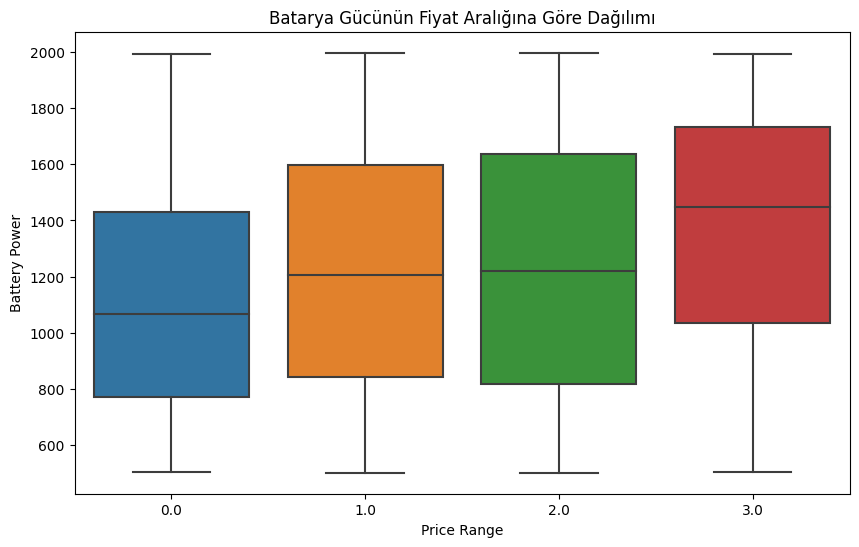

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='battery_power', data=cell_phone_data)
plt.title('Batarya Gücünün Fiyat Aralığına Göre Dağılımı')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.show()

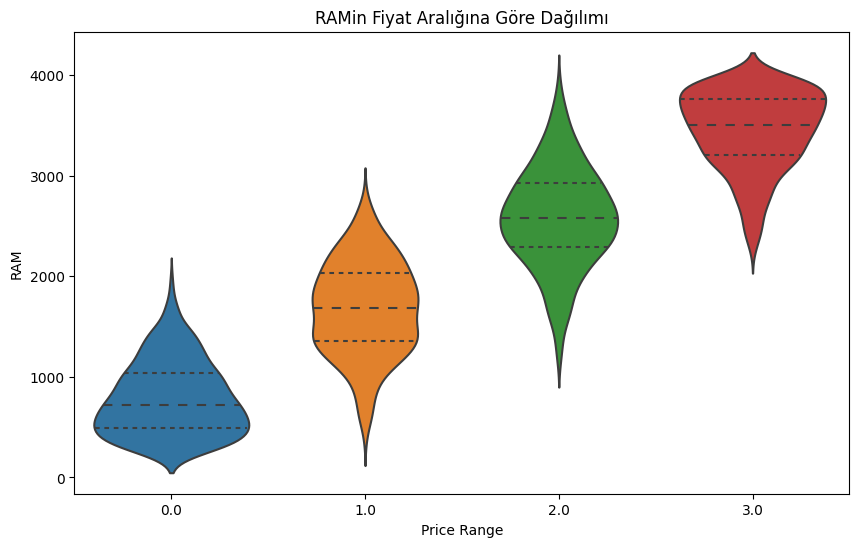

In [17]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='price_range', y='ram', data=cell_phone_data, inner="quartile")
plt.title('RAMin Fiyat Aralığına Göre Dağılımı')
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.show()

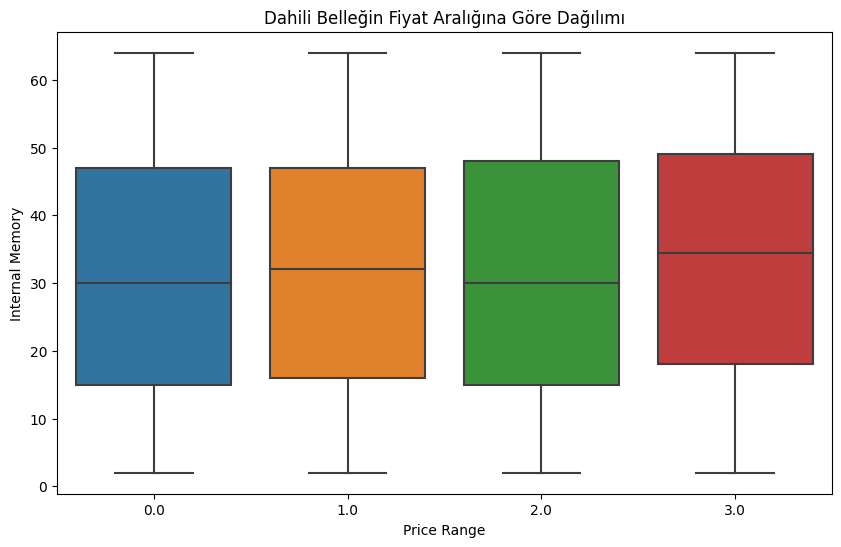

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='int_memory', data=cell_phone_data)
plt.title('Dahili Belleğin Fiyat Aralığına Göre Dağılımı')
plt.xlabel('Price Range')
plt.ylabel('Internal Memory')
plt.show()

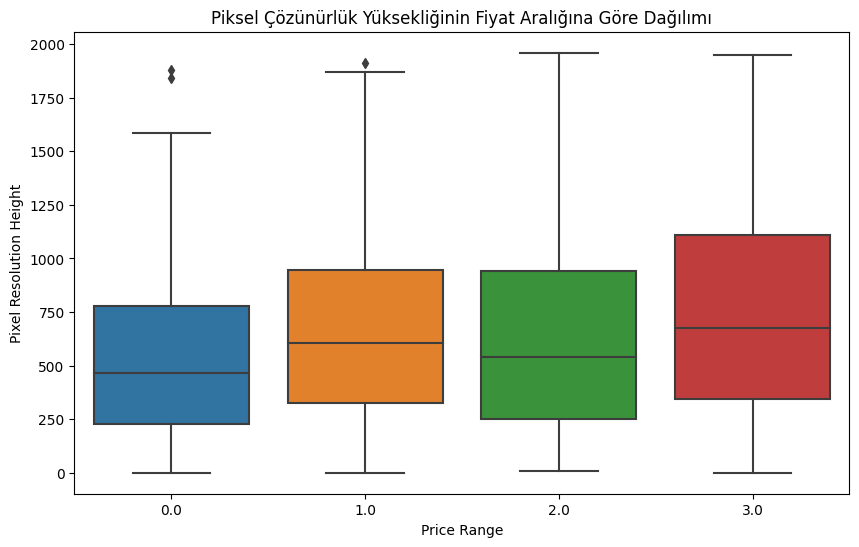

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='px_height', data=cell_phone_data)
plt.title('Piksel Çözünürlük Yüksekliğinin Fiyat Aralığına Göre Dağılımı')
plt.xlabel('Price Range')
plt.ylabel('Pixel Resolution Height')
plt.show()

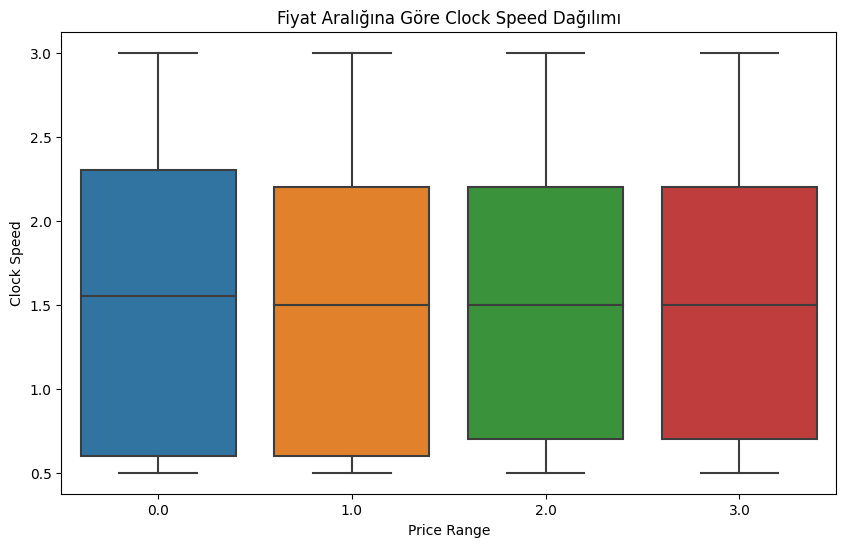

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='clock_speed', data=cell_phone_data)
plt.title('Fiyat Aralığına Göre Clock Speed Dağılımı')
plt.xlabel('Price Range')
plt.ylabel('Clock Speed')
plt.show()

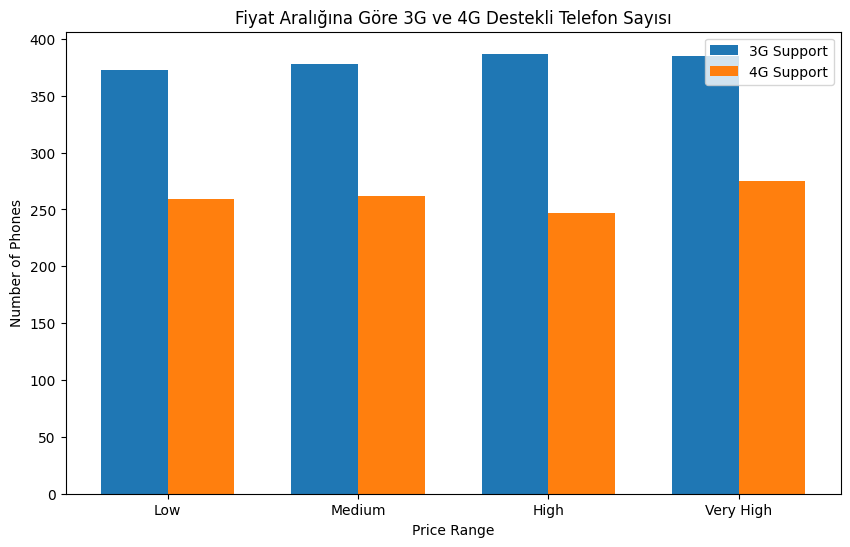

In [21]:
three_g_counts = cell_phone_data.groupby('price_range')['three_g'].sum()
four_g_counts = cell_phone_data.groupby('price_range')['four_g'].sum()

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(three_g_counts))
plt.bar(index, three_g_counts, bar_width, label='3G Support')
plt.bar([i + bar_width for i in index], four_g_counts, bar_width, label='4G Support')

plt.xlabel('Price Range')
plt.ylabel('Number of Phones')
plt.title('Fiyat Aralığına Göre 3G ve 4G Destekli Telefon Sayısı')
plt.xticks([i + bar_width / 2 for i in index], ['Low', 'Medium', 'High', 'Very High'])
plt.legend()
plt.show()

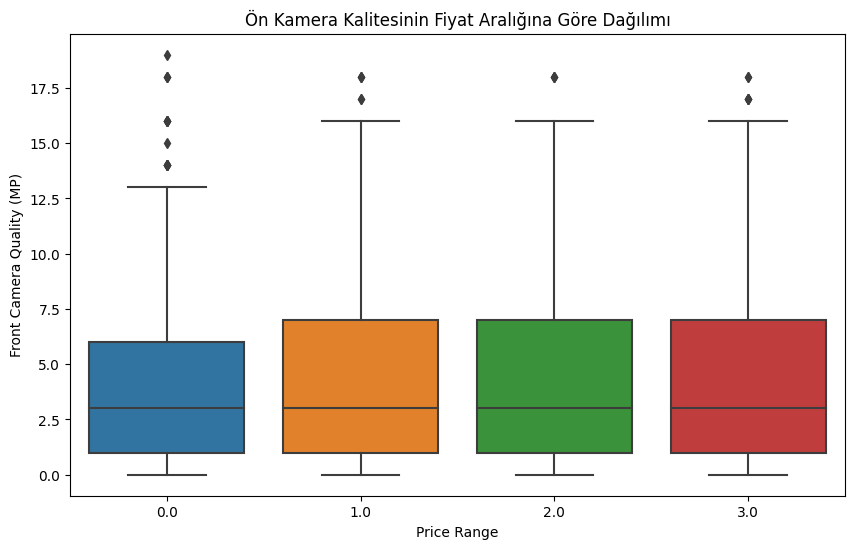

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='fc', data=cell_phone_data)
plt.title('Ön Kamera Kalitesinin Fiyat Aralığına Göre Dağılımı')
plt.xlabel('Price Range')
plt.ylabel('Front Camera Quality (MP)')
plt.show()

In [23]:
print("Train veri seti istatistikleri:\n", train_data.describe())
print("\nTest veri seti istatistikleri:\n", test_data.describe())

Train veri seti istatistikleri:
        battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2

In [24]:
print("Train veri seti fiyat dağılımı:\n", train_data['price_range'].describe())

Train veri seti fiyat dağılımı:
 count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64


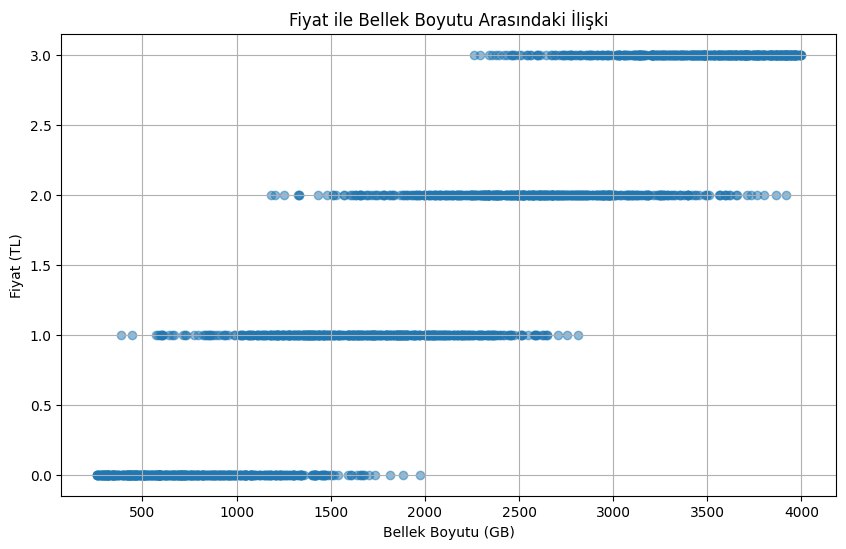

In [25]:
import matplotlib.pyplot as plt

price = train_data['price_range']
ram = train_data['ram']

plt.figure(figsize=(10, 6))
plt.scatter(ram, price, alpha=0.5)
plt.title('Fiyat ile Bellek Boyutu Arasındaki İlişki')
plt.xlabel('Bellek Boyutu (GB)')
plt.ylabel('Fiyat (TL)')
plt.grid(True)
plt.show()

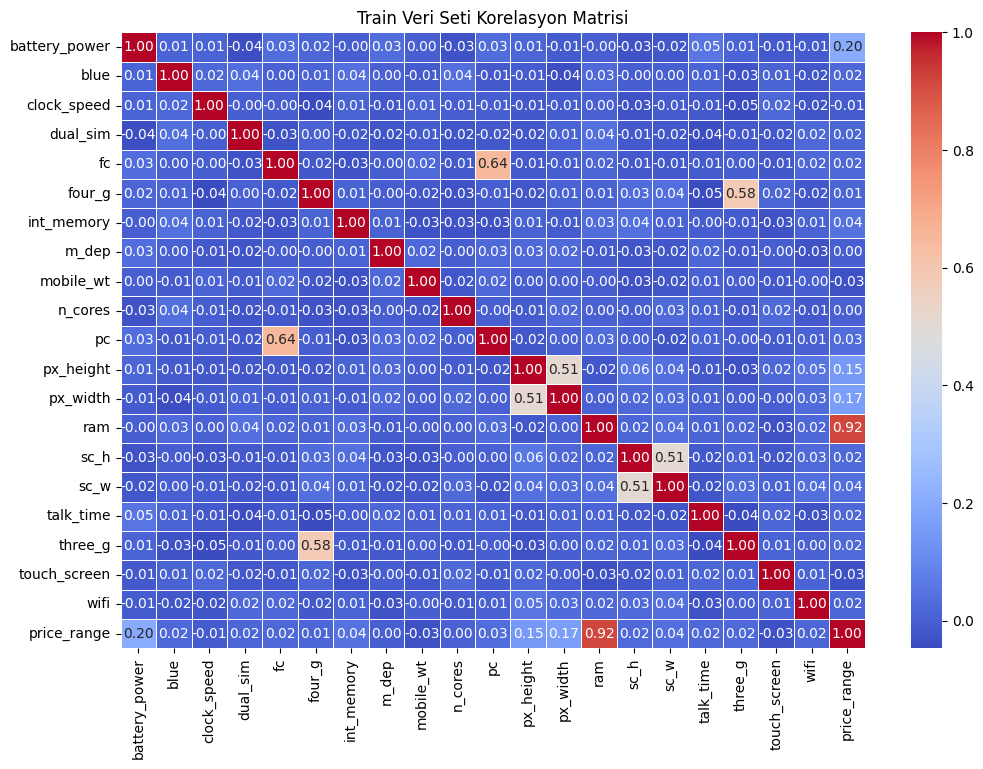

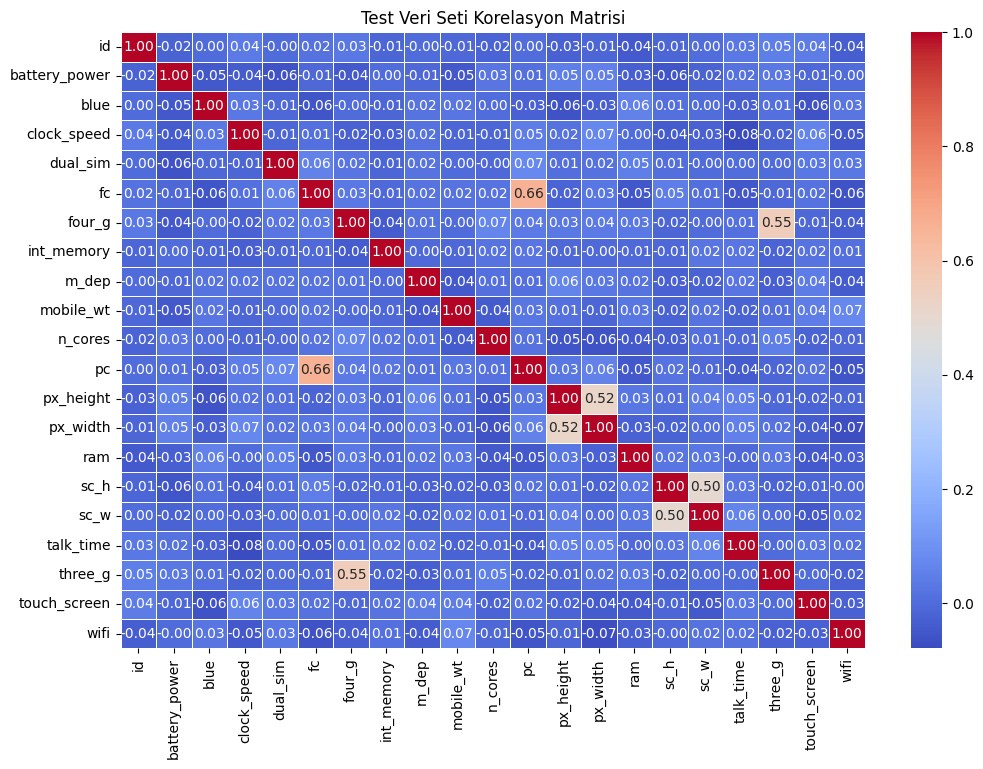

In [26]:
import seaborn as sns
train_corr = train_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(train_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Train Veri Seti Korelasyon Matrisi')
plt.show()

test_corr = test_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(test_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Test Veri Seti Korelasyon Matrisi')
plt.show()
